In [14]:
'''Import libraries'''
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Exploratory data analysis

In [15]:
'''Load csv file'''
data = pd.read_csv("mbti_1.csv")
'''find number of rows and columns of data'''
print("the number of rows and columns of data",data.shape,'\n')

'''View information about the dataset'''
data.info()


'''observe posts content'''
#print(data.iloc[0,1])

'''Check for missing values'''
print()
print("Check for missing values", data.isna().sum())


the number of rows and columns of data (8675, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 67.8+ KB

Check for missing values type     0
posts    0
dtype: int64


In [16]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,"'You still sure? :||||It's a large, loud, and ..."
freq,1832,1


In [17]:
'''Find the types of personality'''
data['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [18]:
'''Find the count of each personality type'''
category_count = data['type'].value_counts()
category_count

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [19]:
posts_separation = data.copy()

'''Function to get number of words per post'''
def get_no_of_words(posts):
    split_posts = posts.split("|||")
    no_of_words = sum(len(post.split()) for post in split_posts)
    return no_of_words / 50

'''Append additional columns to the data by counting different features of the post'''
posts_separation['word_count'] = posts_separation['posts'].apply(get_no_of_words)
posts_separation['http_count'] = posts_separation['posts'].apply(lambda x: x.count('http')/50)
posts_separation['?_count'] = posts_separation['posts'].apply(lambda x: x.count('?')/50)
posts_separation['!_count'] = posts_separation['posts'].apply(lambda x: x.count('!')/50)
posts_separation['len_per_post'] = posts_separation['posts'].apply(lambda x: len(x)/50)
posts_separation['digits_per_post'] = posts_separation['posts'].apply(lambda x: sum(i.isdigit() for i in x)/50)
posts_separation['image_count'] = posts_separation['posts'].apply(lambda x: x.count('.jpg')/50)
posts_separation.head()


,type,posts,word_count,http_count,?_count,!_count,len_per_post,digits_per_post,image_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,12.10,0.48,0.36,0.06,93.04,2.18,0.12
1,ENTP,'I'm finding the lack of me in these posts ver...,24.38,0.20,0.10,0.00,141.06,2.18,0.02
2,INTP,'Good one _____ https://www.youtube.com/wat...,17.70,0.10,0.24,0.08,105.30,1.88,0.00
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",22.26,0.04,0.22,0.06,125.42,0.66,0.00
4,ENTJ,'You're fired.|||That's another silly misconce...,20.32,0.12,0.20,0.02,122.22,0.82,0.04


Mean of word count: 25.476221325648417


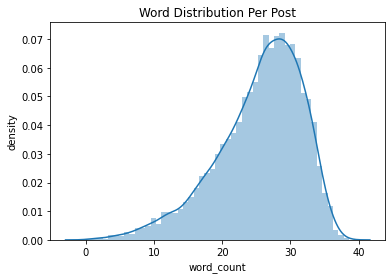

In [20]:
'''See the data distribution of words per post'''

x = sns.distplot(posts_separation["word_count"],kde=True)
x.set_title('Word Distribution Per Post')
x.set_ylabel("density");
print("Mean of word count:", posts_separation["word_count"].mean())

Text(0.5, 1.0, 'Word Distrubtion per Personality type')

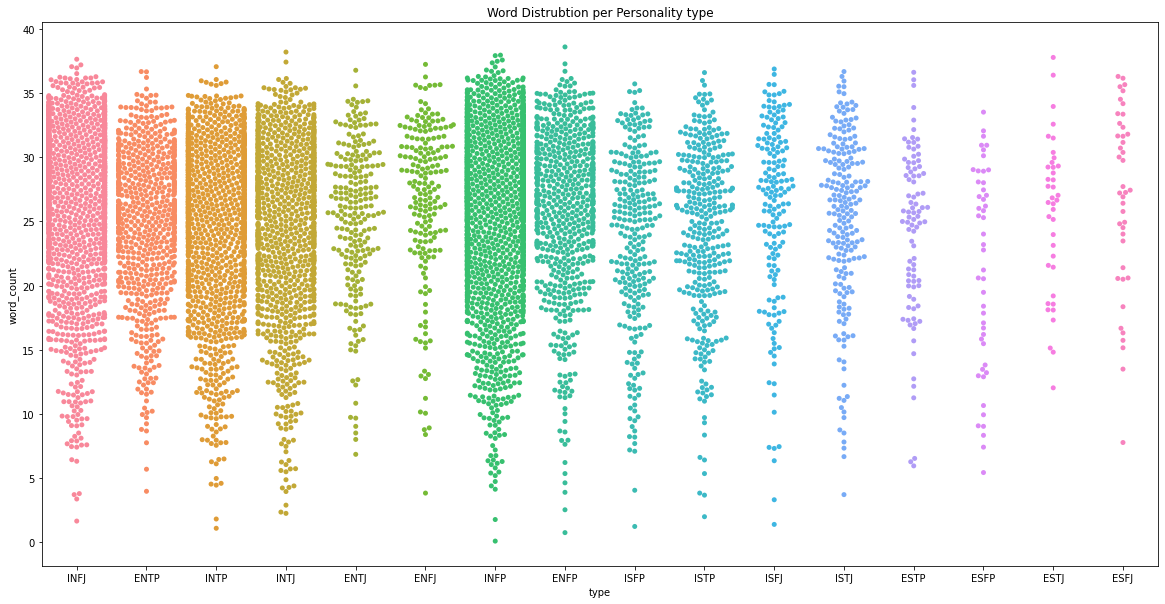

In [21]:
'''Find Word Distrubtion per Personality type, 
denser the points that number of words are used each person in specific personality '''

plt.figure(figsize=(20,10))
x = sns.swarmplot("type","word_count", data=posts_separation)
x.set_title('Word Distrubtion per Personality type')

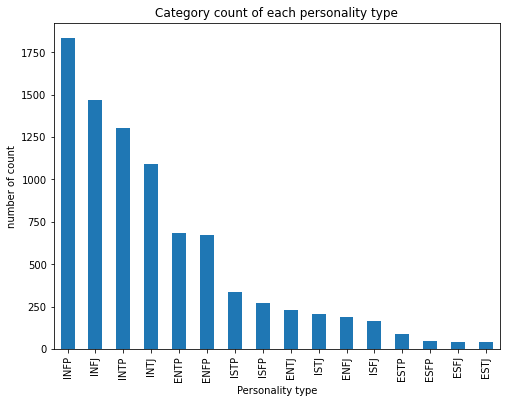

In [22]:
'''which personality type is the most common in our sample?'''

plt.figure(figsize=(8, 6))
category_count.plot(kind='bar')
plt.xlabel('Personality type')
plt.ylabel('number of count')
plt.title('Category count of each personality type')
plt.show()

In [23]:
'''What are the most used words in each personality type?'''

personality_data = data.groupby("type")['posts'].apply(' '.join).reset_index()
personality_data

,type,posts
0,ENFJ,'https://www.youtube.com/watch?v=PLAaiKvHvZs||...
1,ENFP,"'He doesn't want to go on the trip without me,..."
2,ENTJ,'You're fired.|||That's another silly misconce...
3,ENTP,'I'm finding the lack of me in these posts ver...
4,ESFJ,'Why not?|||Any other ESFJs originally mistype...
5,ESFP,'Edit: I forgot what board this was on.|||I am...
6,ESTJ,"this is such a catch 22 |||I'm here! Although,..."
7,ESTP,Splinter Cell Blacklist for Xbox 360.|||ESTPs ...
8,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
9,INFP,'I think we do agree. I personally don't consi...


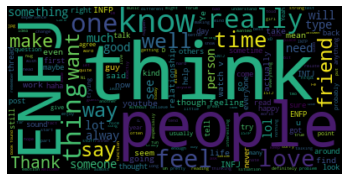

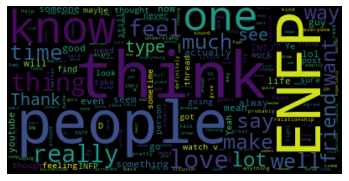

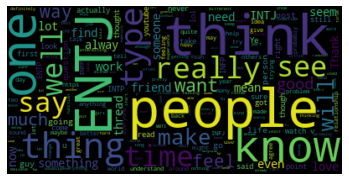

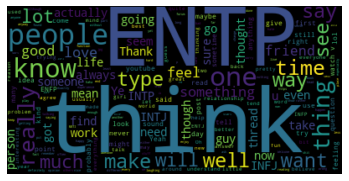

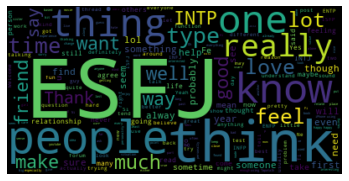

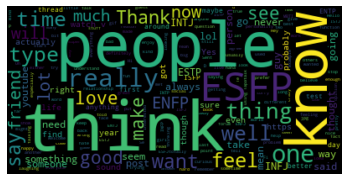

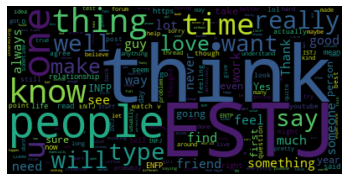

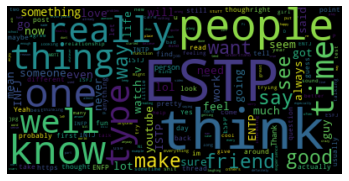

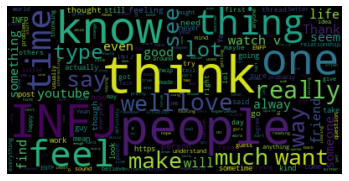

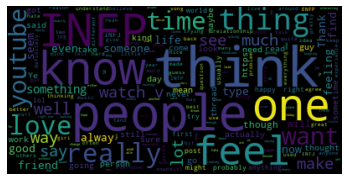

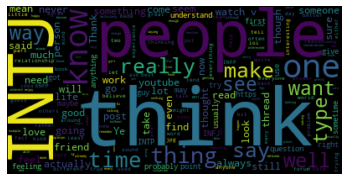

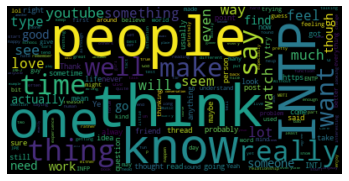

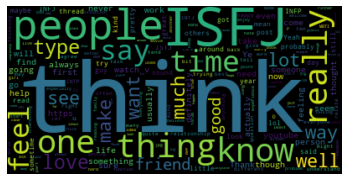

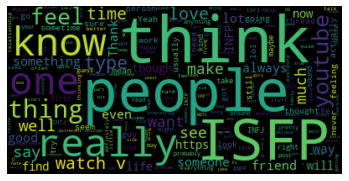

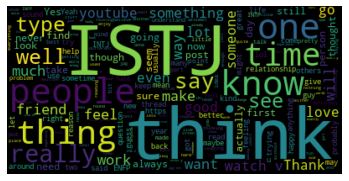

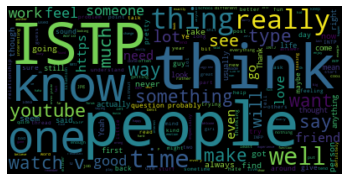

In [11]:
'''Using word cloud' to find most frequent words for each personality type after removing stopwords'''

def word_cloud(text, title):
    word_cloud = WordCloud(stopwords = STOPWORDS, background_color="black").generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

for i, t in enumerate(personality_data['type']):
    text = personality_data.iloc[i,1]
    word_cloud(text, t)

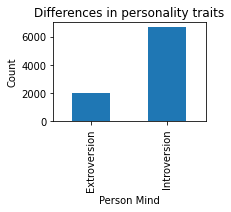

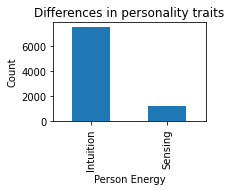

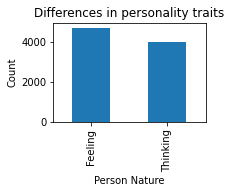

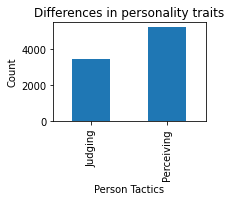

In [24]:
'''Which characteristic is most frequent in personality type combination? '''

personality_seperation = data.copy()

personality_seperation['I-E'] = personality_seperation['type'].map(lambda x: 'Introversion' if x[0] == 'I' else 'Extroversion')
personality_seperation['N-S'] = personality_seperation['type'].map(lambda x: 'Intuition' if x[1] == 'N' else 'Sensing')
personality_seperation['T-F'] = personality_seperation['type'].map(lambda x: 'Thinking' if x[2] == 'T' else 'Feeling')
personality_seperation['J-P'] = personality_seperation['type'].map(lambda x: 'Judging' if x[3] == 'J' else 'Perceiving')


plt.subplot(2,2,1)
personality_seperation.groupby('I-E')['I-E'].count().plot(kind='bar')
plt.xlabel('Person Mind')
plt.ylabel('Count')
plt.title('Differences in personality traits')
plt.show()


plt.subplot(2,2,2)
personality_seperation.groupby('N-S')['N-S'].count().plot(kind='bar')
plt.xlabel('Person Energy')
plt.ylabel('Count')
plt.title('Differences in personality traits')
plt.show()


plt.subplot(2,2,3)
personality_seperation.groupby('T-F')['T-F'].count().plot(kind='bar')
plt.xlabel('Person Nature')
plt.ylabel('Count')
plt.title('Differences in personality traits')
plt.show()


plt.subplot(2,2,4)
personality_seperation.groupby('J-P')['J-P'].count().plot(kind='bar')
plt.xlabel('Person Tactics')
plt.ylabel('Count')
plt.title('Differences in personality traits')
plt.show()
